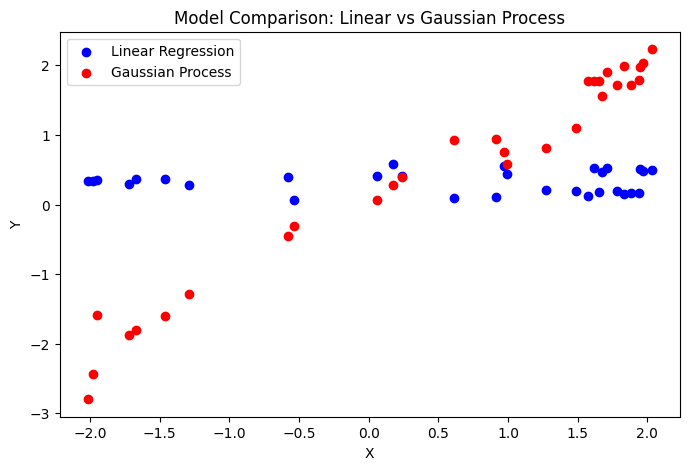

Linear Regression R2: -0.03110016752717759
Gaussian Process R2: 0.9662192666783447


In [13]:
# Example: Compare Linear Regression and Gaussian Process Regression on a nonlinear system

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import r2_score

# Generate synthetic nonlinear data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
X = np.transpose(np.array([np.linspace(0,10,100),np.linspace(0,10,100)]).reshape(2,-1))
Y = np.sin(X[:,0]).ravel()+np.sin(X[:,1]).ravel() + 0.1 * np.random.randn(100)

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred_lin = lin_reg.predict(X_test)

# Gaussian Process Regression
kernel = 1.0 * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gpr.fit(X_train, Y_train)
Y_pred_gpr, Y_std_gpr = gpr.predict(X_test, return_std=True)

# Plot results
plt.figure(figsize=(8,5))
#plt.scatter(X_test, Y_test, color='black', label='True values')
plt.scatter(Y_test, Y_pred_lin, color='blue', label='Linear Regression')
plt.scatter(Y_test, Y_pred_gpr, color='red', label='Gaussian Process')
#plt.fill_between(Y_test, Y_pred_gpr - Y_std_gpr, Y_pred_gpr + Y_std_gpr, color='red', alpha=0.2)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Comparison: Linear vs Gaussian Process')
plt.show()

# Print R2 scores
print("Linear Regression R2:", r2_score(Y_test, Y_pred_lin))
print("Gaussian Process R2:", r2_score(Y_test, Y_pred_gpr))